# MACHINE LEARNING INTERN @BHARAT INTERN

### AUTHOR : PARVEJ ALAM M. ANSARI

# TASK 2 : WINE QUALITY PREDICTION

# 1. Importing the required libraries :

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 2. Importing the dataset :

In [2]:
%pwd

'/home/ali/Documents/FSDS/Bharat Internship/Machine Learning/Task-2 - Wine Quality Prediction/Wine Quality Prediction'

In [3]:
df = pd.read_csv('/home/ali/Documents/FSDS/Bharat Internship/Machine Learning/Task-2 - Wine Quality Prediction/Wine Quality Prediction/winequality.csv')

In [4]:
# FIRST 10 ROWS OF THE DATASET
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
# COLUMNS :

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# SIZE OF THE DATASET
df.shape

(1599, 12)

In [7]:
# DATA TYPES OF THE COLUMNS OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 3. Data Preprocessing :

In [9]:
# DATA TYPES OF THE COLUMNS OF THE DATASET
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# REMOVAL OF DUPLICATE VALUE 

counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 240


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [13]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
6,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
8,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824


In [14]:
corr = df.corr()

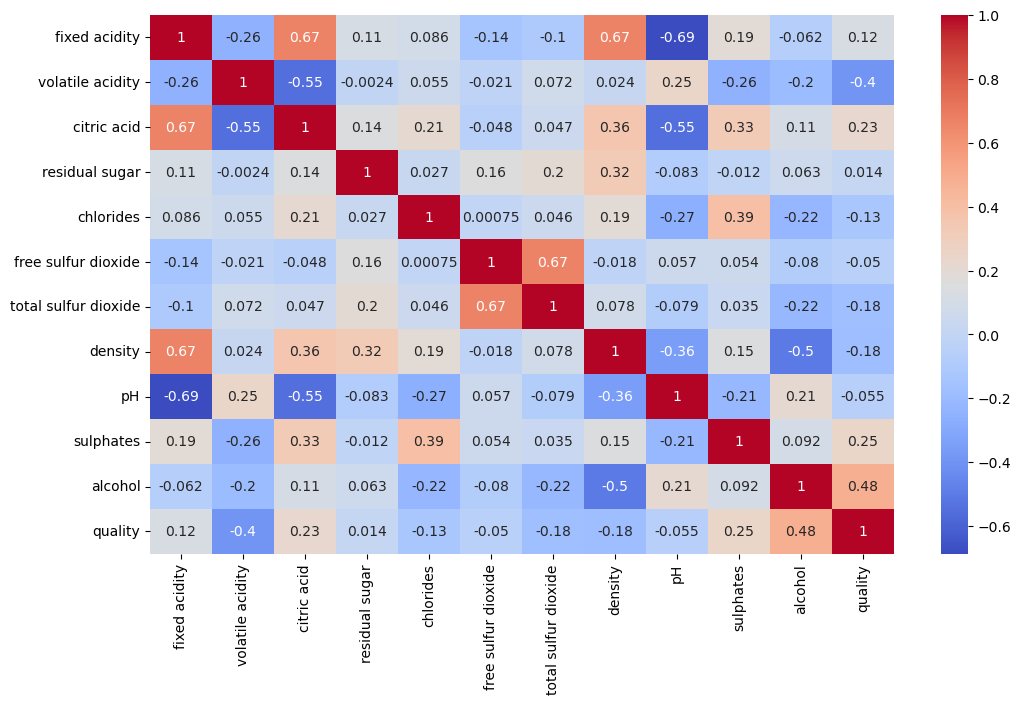

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

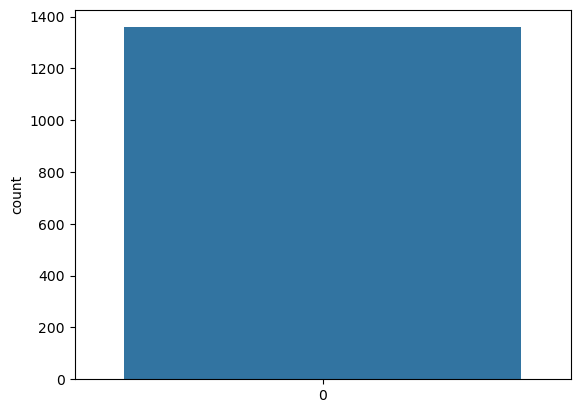

In [16]:
sns.countplot(df['quality'])
plt.show()

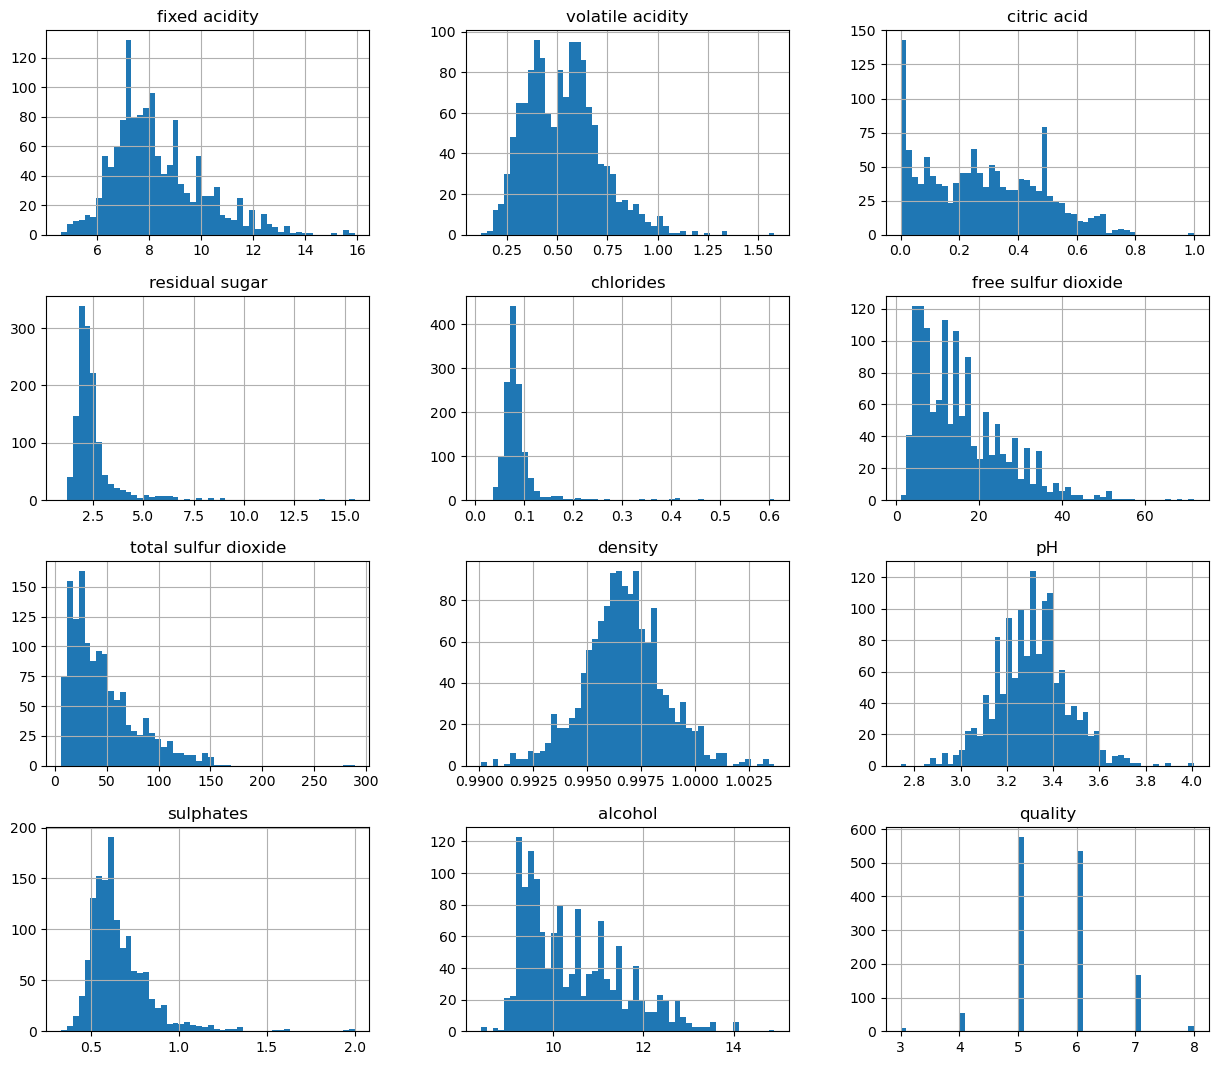

In [17]:
df.hist(figsize=(15,13),bins=50)
plt.show()

In [18]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

We have created another column named "goodquality" which has value 1 if the wine quality >= 7 otherwise 0. i.e if the value is 1 then the wine is goof quality otherwise it is decent or bad quality.

# 4. Spliting The dataset :

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
# scaling the dataset
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

<IPython.core.display.Javascript object>

In [21]:
X_train[0]

array([ 0.35162311, -0.82832312,  0.64877105, -0.23844033, -0.41160622,
       -0.3620704 , -0.56629785, -0.98661183, -0.25982192,  0.51985077,
        1.98424001])

In [22]:
y_test[0:5]

55      0
1291    0
1544    1
593     0
1261    0
Name: goodquality, dtype: int64

# 5. Logistic Regression Model :

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

prediction = model.predict(X_test)

prediction[0:15]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix

print(accuracy_score(prediction,y_test))

0.8933823529411765


# 6. Saving The Model Using Pickle :

In [28]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)



In [29]:
with open('model.pkl','rb') as file:
    model = pickle.load(file)

In [30]:
value = df.iloc[18,0:11].values

In [31]:
model.predict([value])

array([0])